In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [5]:
def get_data(bank="A"):
    fnames = glob.glob(fdir+'Daisy/*/*_03_*'+bank+'*rfireduced.npz')
    fnames.sort()
    fdiode, pdiode = np.load('../calibrations/lownoise_calibration_3C295_03_'+bank+'.npy')
    calibrated = [] 
    ras = []
    decs = []
    meansub = []
    for fname in fnames:
        nz = np.load(fname)
        ra = nz['sra']
        dec = nz['sdec']
        mask = nz['valid']

        gain = pdiode / ( nz['xxon'] - nz['xxoff'])
        ratio = nz['xxoff'] / nz['xxon']
        calibd = nz['xxoff'] * gain

        sigma = 1. / np.sqrt(1500.e6 / 512. * 0.04)
        noiseratio = ratio.std(0) / ratio.mean(0)
        bad = noiseratio > ( np.nanmedian(noiseratio) + sigma )
        mask[bad] = False
        gainmedian = np.nanmedian(np.nanmean(gain[:, mask], 1))
        gainstd = np.nanstd(np.nanmean(gain[:, mask], 1))
        tmask = np.abs(np.nanmean(gain[:, mask], 1) - gainmedian) < (4. * gainstd)

        calibd = calibd[tmask,:][:,mask]
        cleandata_tod = np.nanmean(calibd, 1)

        calibrated = np.concatenate([calibrated, cleandata_tod])
        meansub = np.concatenate([meansub, cleandata_tod - np.nanmedian(cleandata_tod)])
        ras = np.concatenate([ras, ra[tmask]])
        decs = np.concatenate([decs, dec[tmask]])
    return calibrated, meansub, ras, decs

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


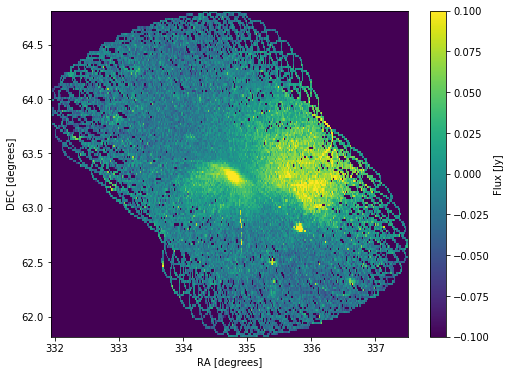

In [65]:
calibrated, meansub, ras, decs = get_data('A')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

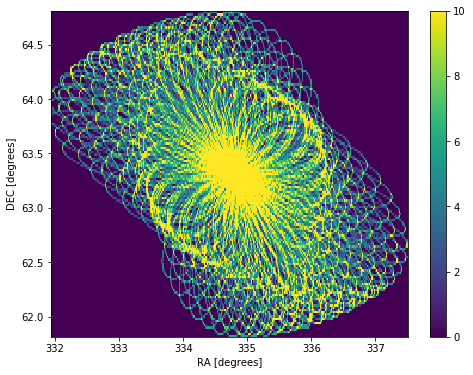

In [69]:
pc = pcolormesh(rabins, decbins, hits.T)
clim(0, 10)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


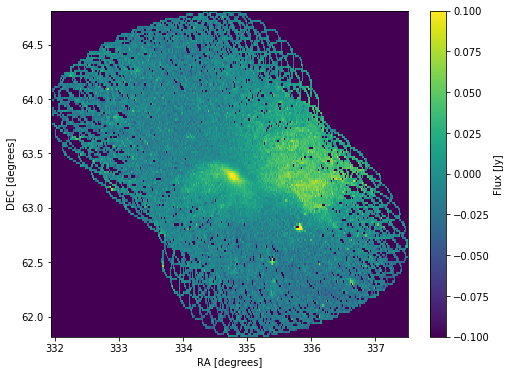

In [7]:
calibrated, meansub, ras, decs = get_data('B')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalB = datamap / hits
signalB[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalB.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


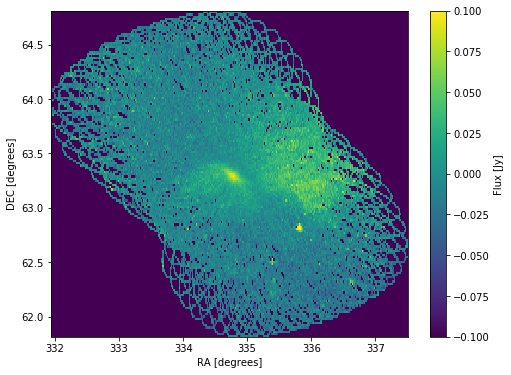

In [8]:
calibrated, meansub, ras, decs = get_data('C')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalC = datamap / hits
signalC[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalC.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [33]:
rc = 335.
dc = 63.38 

In [34]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
annulus = (radius > 80./60.) & (radius < 2.)

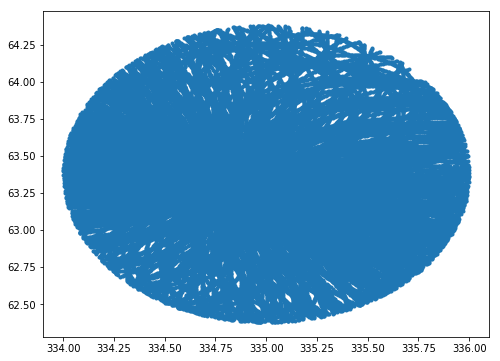

In [35]:
plot(ras[rmask], decs[rmask], '.')

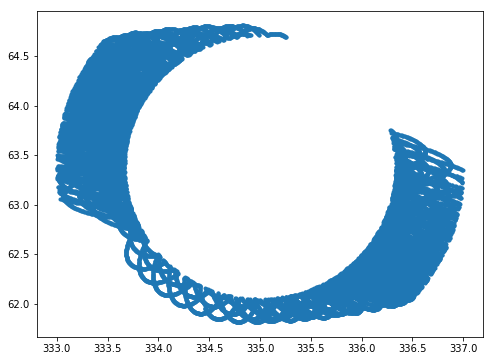

In [36]:
plot(ras[annulus], decs[annulus], '.')

In [31]:
calibrated, meansub, ras, decs = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [60]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
annulus = (radius > 80./60.) & (radius < 2.)
datamap, hits, rabins, decbins = naive_map(meansub[rmask], ras[rmask], decs[rmask], 40, 40)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = 0

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


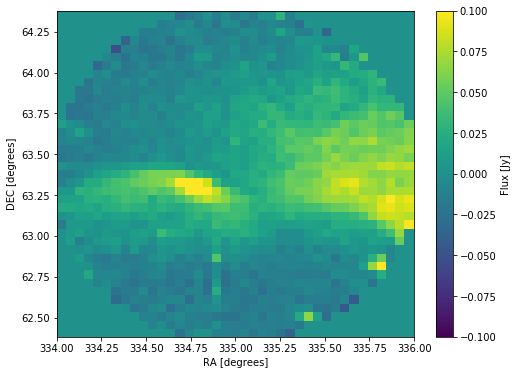

In [61]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [40]:
datamap, hits, rabins, decbins = naive_map(meansub[annulus], ras[annulus], decs[annulus], 80, 60)
mask = hits == 0
nullA = datamap / hits
nullA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


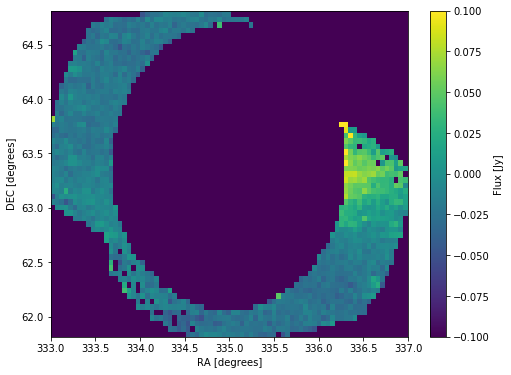

In [41]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, nullA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [42]:
np.nanmedian(nullA)

-0.016525671176312148

In [43]:
print np.nansum(nullA)

-14.2061948256


In [44]:
fluxA = np.nansum(signalA - np.nanmedian(nullA))
print fluxA

35.996748955


In [46]:
36 * ((3./(2.*60.))) **2

0.022500000000000006

In [22]:
fluxA - np.nanmedian(nullA)

138.16700461591708

In [52]:
import scipy.ndimage as ndimage

In [98]:
signalA.shape

(119, 119)

In [47]:
test = np.zeros([120, 120])

In [49]:
test[60, 60] = 1.

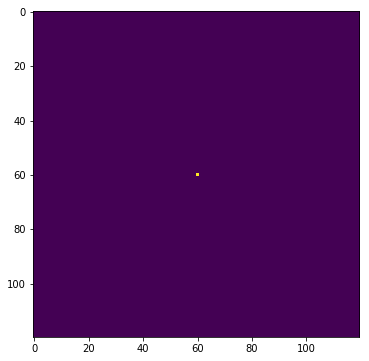

In [50]:
imshow(test)

In [55]:
img = ndimage.gaussian_filter(test, sigma=25.5, order=0)

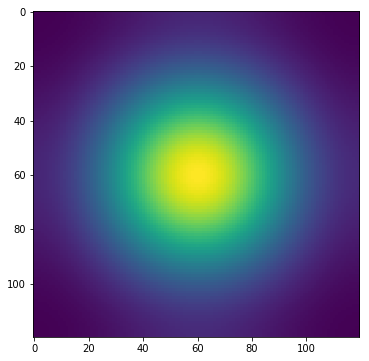

In [56]:
imshow(img)

In [59]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [ ]:
signalA[signa]

In [62]:
img = ndimage.gaussian_filter(signalA.T, sigma=25.5, order=0)

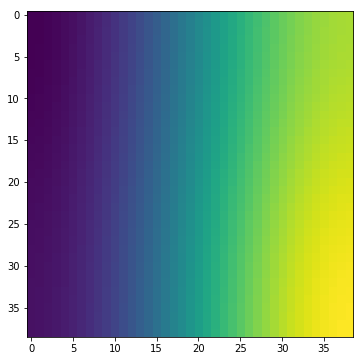

In [63]:
imshow(img)

In [107]:
np.sum(img)

138.15166020299097

In [111]:
datamap, hits, rabins, decbins = naive_map(meansub[annulus], ras[annulus], decs[annulus], 240, 180)
mask = hits == 0
nullA = datamap / hits
nullA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


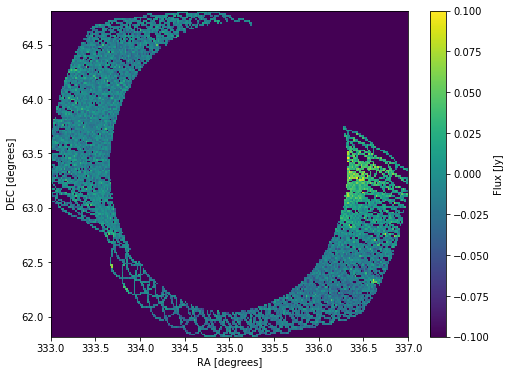

In [112]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, nullA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [113]:
backgroundA = np.nanmedian(nullA)
print backgroundA

-0.0101413667748


In [114]:
print np.nanstd(nullA)

0.0193399928697


In [115]:
print np.nansum(nullA)

-77.1127157588


In [116]:
fluxA = np.nansum(signalA)
print fluxA

86.0031057462


In [6]:
calibrated, meansub, ras, decs = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [7]:
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signal = datamap / hits
signal[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


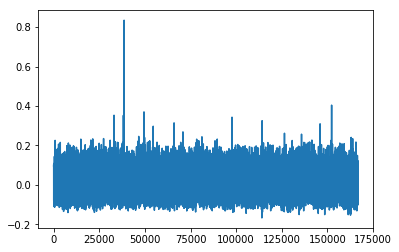

In [8]:
plot(meansub)

/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


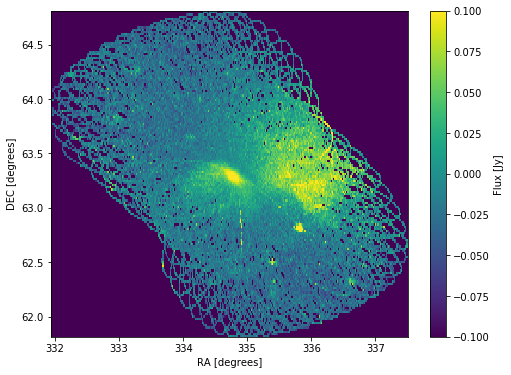

In [9]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signal.T)
clim(-0.1, 0.1)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [10]:
calibrated, meansub, ras, decs = get_data('B')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [11]:
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signal = datamap / hits
signal[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


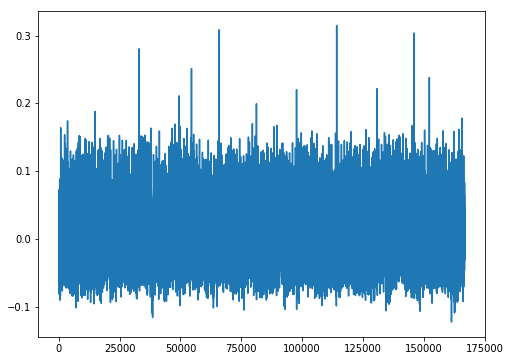

In [12]:
plot(meansub)

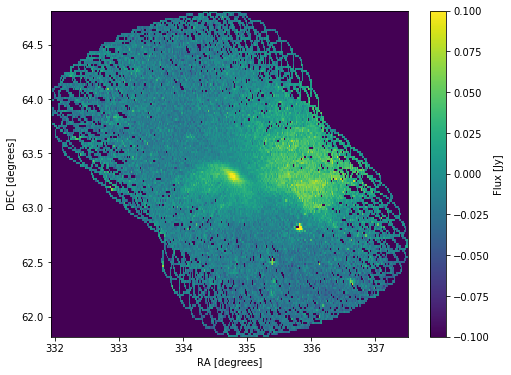

In [13]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signal.T)
clim(-0.1, 0.1)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [14]:
calibrated, meansub, ras, decs = get_data('C')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


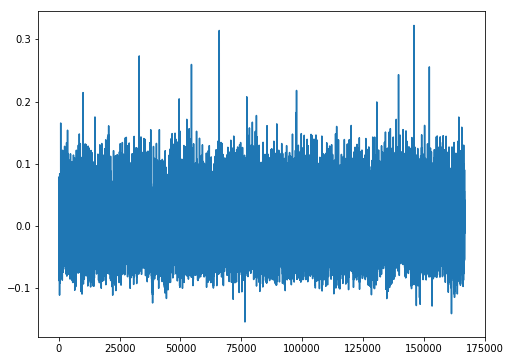

In [15]:
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signal = datamap / hits
signal[mask] = np.nan
plot(meansub)

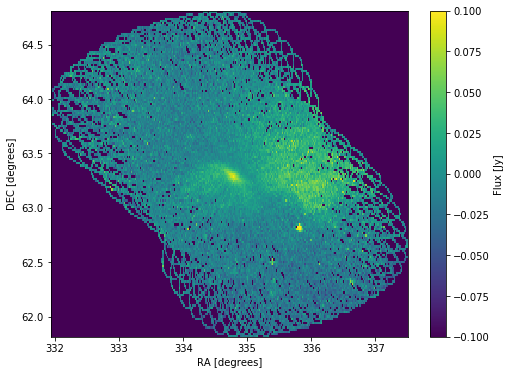

In [16]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signal.T)
clim(-0.1, 0.1)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [17]:
calibrated, meansub, ras, decs = get_data('D')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib64/python2.7/site-packages/numpy/lib/nanfunctions.py:1304: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: Mean of empty slice.
/usr/lib64/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


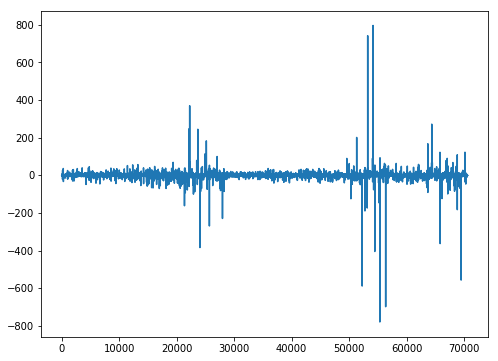

In [18]:
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signal = datamap / hits
signal[mask] = np.nan
plot(meansub)

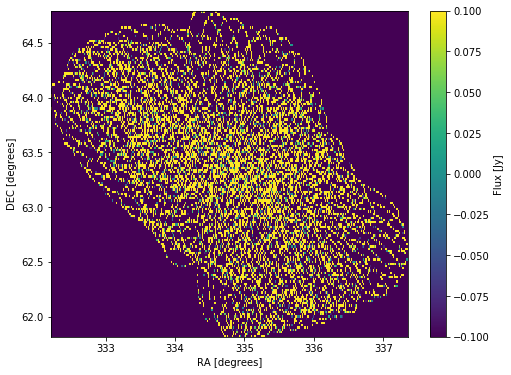

In [19]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signal.T)
clim(-0.1, 0.1)
cb = colorbar()
#pc.cmap.set_under('w')
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')